In [ ]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# %matplotlib widget
%matplotlib inline

In [2]:
svec = loadtxt("../Data/2x2-6p-p2/normal.cell")
rvec = svec/2
b = 4*pi/(linalg.norm(rvec[0])*sqrt(3))
qvec = b*array([[-sqrt(3)/2,-1/2,0],[0,1,0],[sqrt(3)/2,-1/2,0]])/2
qdif = array([[qvec[0]-qvec[1],qvec[1]-qvec[2],qvec[2]-qvec[0]]])
qdif= qdif[0]
qunit = qvec/abs(linalg.norm(qvec[0]))


In [3]:
n_data = loadtxt("../Data/2x2-6p-p2/n.pos")
m_data = loadtxt("../Data/2x2-6p-p2/m.pos")


n_atom = dot(n_data,svec)
n_atom = n_atom-n_atom[0]
m_atom = dot(m_data,svec)
m_atom += average(n_atom[:4]-m_atom[:4],axis=0)
u = around(m_atom - n_atom,8)

In [24]:
def plot_lattice():
    fig = plt.figure(figsize=(10,10))
    s1, s2 = 200,300
    hw=0.2
    
    cell_color="black"
    cell_lw=5
    cell_zorder=0
    
    plt.scatter(n_atom[0][0],n_atom[0][1],c="blue",s=s2,label="Nb")
    plt.scatter(n_atom[4][0],n_atom[4][1],c="green",s=s1,label="Se")
    period = arange(-2,3,1)
    for i in period:
        for j in period:
    #         print(i,j)
            plt.scatter(n_atom[:4].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:4].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[4:].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[4:].T[1]+(i*svec[0][1]+j*svec[1][1]),c="green",s=s1,zorder=2)
     
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
#             plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
 


            for k in range(1,4):
                plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
#             for k in range(7,8):
#                 plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
#             for k in range(6,7):
#                 plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw,capstyle="butt")   
    plt.xlim(-10,10)
    plt.ylim(-5,15)
    plt.xticks([])
    plt.yticks([])
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)


#     plt.savefig("3x3_lattice.png")
    plt.savefig("../Plot/2x2_phase2.png",bbox_inches='tight')
#     plt.axis("equal")
#     plt.show()

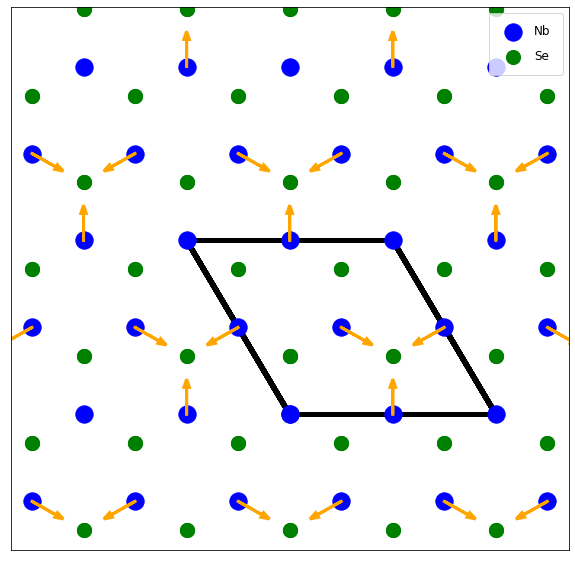

In [26]:
plot_lattice()

In [7]:
def plot_lattice():
    fig = plt.figure(figsize=(12,10))
    s1, s2 = 200,300
    hw=0.2
    
    cell_color="black"
    cell_lw=5
    cell_zorder=0
    
    plt.scatter(n_atom[0][0],n_atom[0][1],c="blue",s=s2,label="Nb")
#     plt.scatter(n_atom[4][0],n_atom[4][1],c="green",s=s1,label="Se")
    period = arange(-2,3,1)
    for i in period:
        for j in period:
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]+svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[svec[1][1],svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[0][0]],[0,svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([0,svec[1][0]],[0,-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[0][0],svec[0][0]+svec[1][0]],[svec[0][1],svec[0][1]-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],svec[1][0]+svec[0][0]],[-svec[1][1],-svec[1][1]+svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([svec[1][0],-svec[0][0]],[svec[1][1],-svec[0][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            plt.plot([-svec[0][0],svec[1][0]],[svec[0][1],-svec[1][1]],c=cell_color,lw=cell_lw,zorder=cell_zorder)
            
            plt.scatter(n_atom[:4].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[:4].T[1]+(i*svec[0][1]+j*svec[1][1]),c="blue",s=s2,zorder=2)
            plt.scatter(n_atom[4:8].T[0]+(i*svec[0][0]+j*svec[1][0]),n_atom[4:8].T[1]+(i*svec[0][1]+j*svec[1][1]),c=u[4:8].T[2],s=s1,zorder=2)
    


            for k in range(1,6):
                plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
            for k in range(7,8):
                plt.arrow(n_atom.T[0][k]+(i*svec[0][0]+j*svec[1][0]),n_atom.T[1][k]+(i*svec[0][1]+j*svec[1][1]),(u[:,0][k])*10,(u[:,1][k])*10,lw=3,zorder=2,color="orange",head_width=hw)   
    plt.colorbar()
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xticks([])
    plt.yticks([])
    plt.title("Lower Se Plane")
#     plt.axis("equal")
    plt.legend(loc='upper right', borderpad=1,markerscale=1,labelspacing=1,fontsize=12)


#     plt.savefig("3x3_lattice.png")
    plt.savefig("../Plot/2x2_phase2_lower_se.png",bbox_inches='tight')
#     plt.axis("equal")
#     plt.show()

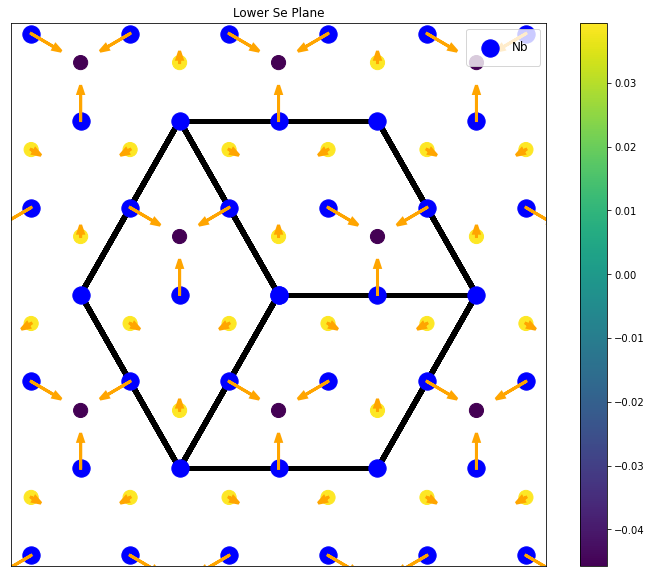

In [8]:
plot_lattice()

In [9]:
u

array([[-0.        ,  0.        ,  0.        ],
       [-0.08627933, -0.0498134 ,  0.        ],
       [-0.        ,  0.0996268 ,  0.        ],
       [ 0.08627933, -0.0498134 ,  0.        ],
       [-0.        ,  0.01229008,  0.03940838],
       [ 0.01064352, -0.00614504,  0.03940838],
       [-0.        , -0.        , -0.04578724],
       [-0.01064352, -0.00614504,  0.03940838],
       [-0.        ,  0.01229008, -0.03940838],
       [ 0.01064352, -0.00614504, -0.03940838],
       [-0.        , -0.        ,  0.04578724],
       [-0.01064352, -0.00614504, -0.03940838]])

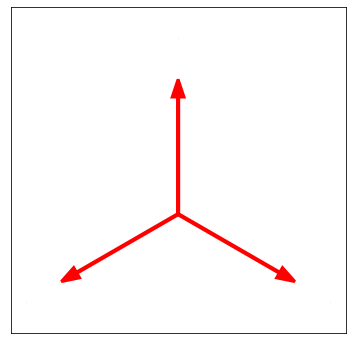

In [28]:
fig = plt.figure(figsize=(6,6))
hw=0.01
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)
plt.plot(0,0,c="blue",label="Nb")
plt.plot(0,0,c="green",label="Se")

for k in range(1,4):
    plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="red",head_width=hw)   
# for k in [4,5,7,8]:
#     plt.arrow(0,0,u[k][0],u[k][1],lw=3,zorder=2,color="green",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
# plt.title("Phase 2 In-Plane Modulation")
# plt.legend()
plt.savefig("../Plot/2x2-p2_nb_mod.png",bbox_inches='tight')
plt.show()


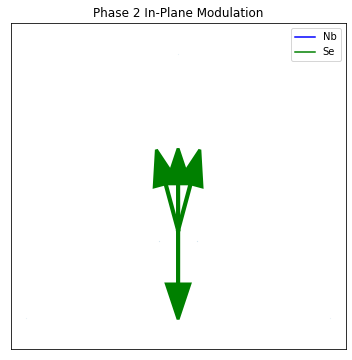

In [11]:
fig = plt.figure(figsize=(6,6))
hw=0.02
plt.scatter(u.T[0]*1.5,u.T[1]*1.5,s=0.001)
plt.plot(0,0,c="blue",label="Nb")
plt.plot(0,0,c="green",label="Se")

# for k in range(1,4):
#     plt.arrow(0,0,u[k][0],u[k][2],lw=3,zorder=2,color="blue",head_width=hw)   
for k in range(4,8):
    plt.arrow(0,0,u[k][0],u[k][2],lw=3,zorder=2,color="green",head_width=hw)   

plt.xticks([])
plt.yticks([])
plt.axis("equal")
plt.title("Phase 2 In-Plane Modulation")
plt.legend()
# plt.savefig("../Plot/2x2-p2_mod.png",bbox_inches='tight')
plt.show()


In [12]:
u

array([[-0.        ,  0.        ,  0.        ],
       [-0.08627933, -0.0498134 ,  0.        ],
       [-0.        ,  0.0996268 ,  0.        ],
       [ 0.08627933, -0.0498134 ,  0.        ],
       [-0.        ,  0.01229008,  0.03940838],
       [ 0.01064352, -0.00614504,  0.03940838],
       [-0.        , -0.        , -0.04578724],
       [-0.01064352, -0.00614504,  0.03940838],
       [-0.        ,  0.01229008, -0.03940838],
       [ 0.01064352, -0.00614504, -0.03940838],
       [-0.        , -0.        ,  0.04578724],
       [-0.01064352, -0.00614504, -0.03940838]])

In [13]:
m_atom

array([[-4.29627778e-10,  6.24500451e-17,  0.00000000e+00],
       [-1.93359174e+00,  3.14982556e+00,  0.00000000e+00],
       [ 3.69462483e+00,  9.96267950e-02,  0.00000000e+00],
       [ 1.93359175e+00,  3.14982556e+00,  0.00000000e+00],
       [-1.04221204e-07,  2.14538278e+00, -1.58088424e+00],
       [-1.83666910e+00,  5.32658681e+00, -1.58088424e+00],
       [ 3.69462450e+00,  2.13309270e+00, -1.66607986e+00],
       [ 1.83666846e+00,  5.32658681e+00, -1.58088424e+00],
       [-1.04221204e-07,  2.14538278e+00,  1.58088424e+00],
       [-1.83666910e+00,  5.32658681e+00,  1.58088424e+00],
       [ 3.69462450e+00,  2.13309270e+00,  1.66607986e+00],
       [ 1.83666846e+00,  5.32658681e+00,  1.58088424e+00]])

In [14]:
utilde = dot(exp(-1j*dot(n_atom,qvec.T)).T,u)

In [38]:
for i in utilde:
    print(norm(i))

0.17978697258197374
0.17978698732501078
0.17978699425289102


In [39]:
for i in utilde:
    print(norm(real(i)))

0.17467341944280684
0.1746734334129971
0.1746734387250171


In [40]:
for i in utilde:
    print(norm(imag(i)))

0.04257407721077047
0.04257408215239468
0.04257408961406892


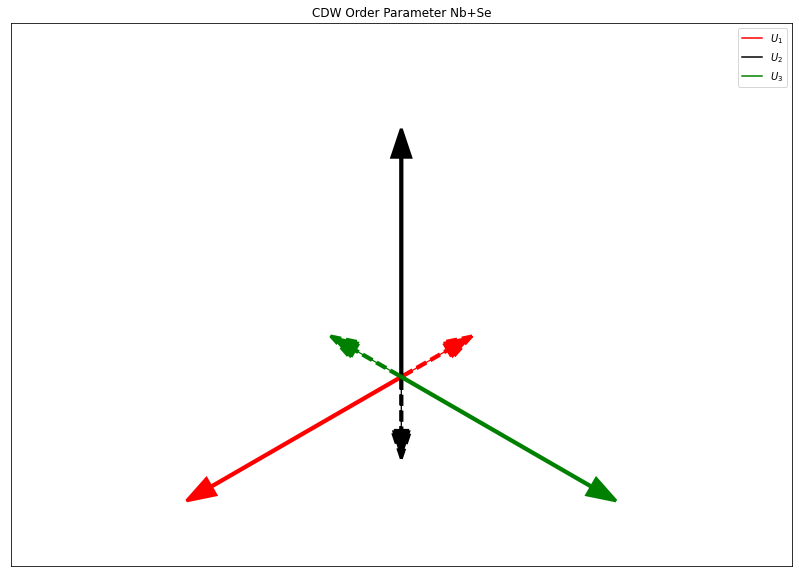

In [41]:
fig = plt.figure(figsize=(14,10))
# for i in qvec:
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="blue")
#     plt.scatter(i[0]*13/10,i[1]*13/10,s=0.0001)
    
colors=["red","black","green"]
    
for i in range(3):
    plt.arrow(0,0,real(utilde)[i][0],real(utilde)[i][1],head_width=0.015,color=colors[i],ls="-",lw=3)
    plt.arrow(0,0,imag(utilde)[i][0],imag(utilde)[i][1],head_width=0.015,color=colors[i],ls="--",lw=3)
    plt.scatter(real(utilde)[i][0]*15/10,real(utilde)[i][1]*15/10,s=0.0001)
    plt.scatter(imag(utilde)[i][0]*15/10,imag(utilde)[i][1]*15/10,s=0.0001)
    plt.plot(0,c=colors[i],label=r"$U_{}$".format(i+1))
    
# for i in real(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="black")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)
    
# for i in imag(utilde):
# #     print(linalg.norm(utilde[i]))
#     plt.arrow(0,0,i[0],i[1],head_width=0.03,color="red")
#     plt.scatter(i[0]*15/10,i[1]*15/10,s=0.0001)


# plt.plot(0,c="black",label="Re(CDW)")
# plt.plot(0,c="red",label="Im(CDW)")
# plt.plot(0,c="blue",label="Q-vec")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.title("CDW Order Parameter Nb+Se")
plt.axis("equal")    
plt.savefig("../Plot/2x2_phase2_nb+se.png",bbox_inches='tight')
plt.show()

In [42]:
norm(u[1])/norm(u[4])

2.413419833892179

In [44]:
for i in u:
    print(norm(i))

0.0
0.09962679160150094
0.0996268
0.09962679160150094
0.04128034012251837
0.041280339737172704
0.04578724
0.041280339737172704
0.04128034012251837
0.041280339737172704
0.04578724
0.041280339737172704


In [50]:
norm(u[1])/norm(u[6])

2.1758636598646466